#### Today's focus: Data Cleaning & Analyzing ####

Data Cleaning : Handle missing value, renaming, etc

Data Analyzing : look for duplicate values

outlier...

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Dataset/property_data.csv')

In [3]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [5]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

take away = data kosong '' dan 'NA' adalah termasuk standard missing value

In [6]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

here, '--' and 'na' is not detected as missing value (a.k.a non-standard missing value)

What can we do about this? 

Declare them as missing value before we load the dataset

In [7]:
missing = ['--', 'na']

In [8]:
df = pd.read_csv('Dataset/property_data.csv', na_values=missing)

In [9]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

Now, pyhton has detected 4 missing values instead of just 2.

#### Unexpected missing values

In [12]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

12 should be detected as missing value coz it supposed to be just Y or N in this column.

In [14]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [13]:
df['OWN_OCCUPIED'].unique()

array(['Y', 'N', '12', nan], dtype=object)

the idea:
* loop thru OWN_OCCUPIED
* `try` and turn the entry into integer
* if can be turned to integer, enter a missing value
* if can't be an integer, then it's string, so keep going

In [15]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan  # np.nan to change the entry into missing value
    except ValueError:
        pass
    cnt+=1

the usage of `try` and `except` `ValueError` is called exception handling.

If we were try and change an entry into an integer and it couldn't be changed, then ValueError would be returned, and the code would stop.
To deal with this, we use exception handilng to recognize theses errors, and keep going.

In [17]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


#### Summarizing Missing Value

In [18]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,True,False,True
8,False,False,False,False,True,False,False


In [19]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

above is the total number of missing values in each column.

In [21]:
df.isnull().sum().sum()  # this will show the total number of missing values

12

another way to check wheter there is missing value in our dataset:

In [24]:
df.isnull() #1st step

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,True,False,True
8,False,False,False,False,True,False,False


In [25]:
df.isnull().values #2nd step

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True],
       [False,  True, False, False,  True, False, False],
       [False, False, False,  True, False,  True, False],
       [ True, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False],
       [False,  True, False,  True, False, False, False],
       [False, False, False, False,  True, False,  True],
       [False, False, False, False,  True, False, False]])

In [26]:
df.isnull().values.any() #3rd step

True

it means our dataset has at least 1 missing value.

### Replacing

Handling missing values by replacing them

In [27]:
df['ST_NUM'].fillna(125, inplace=True)  # fill in missing value with a single value. 125 might be the mean value of this column

In [28]:
df['ST_NUM']

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

More likely, you might want to do a location based imputation. Here's how: 

In [29]:
df.loc[2, 'ST_NUM'] = 125

A very common way to replace missing values is using median:

In [30]:
median = df['NUM_BEDROOMS'].median()
median

3.0

In [31]:
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [32]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


# Analyzing Obesity in England

Using 2014 xls file taken from data.gov.uk

Investigate: ***Children are getting fatter every decade***

In [34]:
%matplotlib inline
data = pd.ExcelFile('dataset/obes2014.xls')

In [36]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

we will be working on sheet 7.2

Now, as can be seen in Excel, the top 4 rows and bottom 14 rows contain useless info for our script. We only need rows 5-17

In [38]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)  # only load sheet 7.2
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


Now, we need to give a header name for year column, and get rid of the empty row.

In [39]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)  # give header name. u = unicode. might work even without u
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [40]:
data_age.dropna(inplace=True)
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [51]:
#Another thing we need to do to make our live easier:

#Remove the first index column so that we have Year column as the index. This way, plotting will be much easier

#data_age.set_index('Year', inplace=True)

<AxesSubplot:xlabel='Year'>

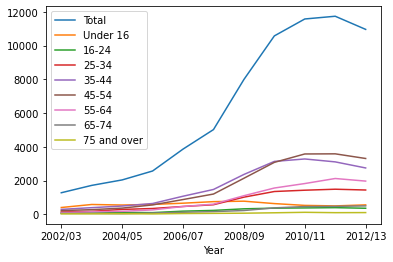

In [50]:
data_age.plot()

We can see that the Total data is overshadowing everything else. We need to get rid of it:

<AxesSubplot:xlabel='Year'>

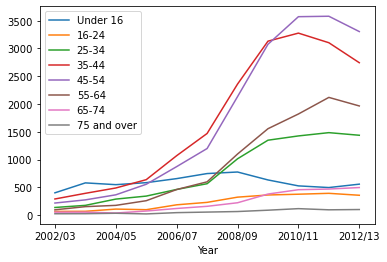

In [53]:
data_age_no_total = data_age.drop('Total', axis=1)
data_age_no_total.plot()

Now we can see which age group has the highest obesity.

Back to our original question: Are children getting fatter?

Let's plot just small section of the data:

<AxesSubplot:xlabel='Year'>

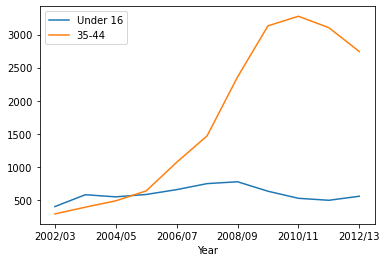

In [54]:
data_age['Under 16'].plot(label='Under 16', legend=True)
data_age['35-44'].plot(label='35-44', legend=True)

Now, we can see clearly who is getting fatter.

While children's obesity has gone slightly down, their parents have ballooned. So it seems the parents need to worry about themselves rather than their children.

# scrib

<AxesSubplot:xlabel='Year'>

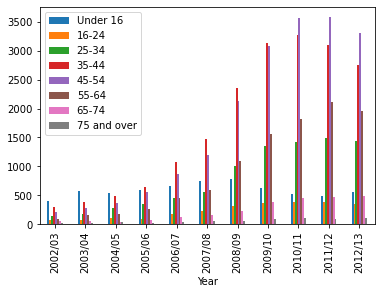

In [57]:
data_age_no_total.plot(kind='bar') #untuk buat diagram batang

In [58]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


if we want to plot specific column which has string as its values, use `value_counts` :

<AxesSubplot:>

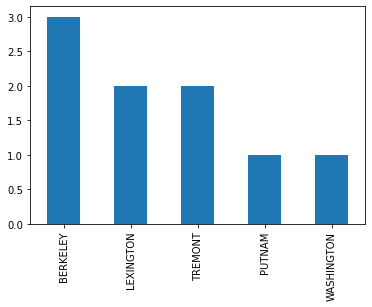

In [59]:
df['ST_NAME'].value_counts().plot(kind='bar')

If the dataset is in .txt format, we can do this:

In [60]:
pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt')
#delimiter = '\t' -> pemisah berupa tab

,user_id;timestamp;group;landing_page;purchased
0,851104;2017-01-21 22:11:48.556739;control;old_...
1,804228;2017-01-12 08:01:45.159739;control;old_...
2,661590;2017-01-11 16:55:06.154213;treatment;ne...
3,853541;2017-01-08 18:28:03.143765;treatment;ne...
4,864975;2017-01-21 01:52:26.210827;control;old_...
...,...
294473,751197;2017-01-03 22:28:38.630509;control;old_...
294474,945152;2017-01-12 00:51:57.078372;control;old_...
294475,734608;2017-01-22 11:45:03.439544;control;old_...
294476,697314;2017-01-15 01:20:28.957438;control;old_...


then add ; as the delimiter

In [61]:
pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt',delimiter=';')
#delimiter = '\t' -> pemisah berupa tab

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


Another way to open excel file:

In [63]:
pd.read_excel('https://github.com/fahmimnalfrzki/Dataset/blob/main/NMC1-9.xlsx?raw=true') # to open the first sheet

,time(s),V_m,Current (A),Cycle,Cap
0,0,4.098,0.997,1,2.840817
1,1,4.096,0.998,1,2.840817
2,2,4.094,0.999,1,2.840817
3,3,4.093,0.998,1,2.840817
4,4,4.092,0.999,1,2.840817
...,...,...,...,...,...
90977,90977,2.506,1.002,9,2.770180
90978,90978,2.504,1.002,9,2.770180
90979,90979,2.502,1.002,9,2.770180
90980,90980,2.500,1.002,9,2.770180


In [62]:
data1 = pd.read_excel('https://github.com/fahmimnalfrzki/Dataset/blob/main/NMC1-9.xlsx?raw=true',sheet_name='Sheet1') # to open with specific sheet name
data1

,time(s),V_m,Current (A),Cycle,Cap
0,0,4.098,0.997,1,2.840817
1,1,4.096,0.998,1,2.840817
2,2,4.094,0.999,1,2.840817
3,3,4.093,0.998,1,2.840817
4,4,4.092,0.999,1,2.840817
...,...,...,...,...,...
90977,90977,2.506,1.002,9,2.770180
90978,90978,2.504,1.002,9,2.770180
90979,90979,2.502,1.002,9,2.770180
90980,90980,2.500,1.002,9,2.770180


use `.drop` to delete row

In [64]:
data1.drop('time(s)', axis=1)

,V_m,Current (A),Cycle,Cap
0,4.098,0.997,1,2.840817
1,4.096,0.998,1,2.840817
2,4.094,0.999,1,2.840817
3,4.093,0.998,1,2.840817
4,4.092,0.999,1,2.840817
...,...,...,...,...
90977,2.506,1.002,9,2.770180
90978,2.504,1.002,9,2.770180
90979,2.502,1.002,9,2.770180
90980,2.500,1.002,9,2.770180


In [65]:
#another way
data1.drop(columns='time(s)')

,V_m,Current (A),Cycle,Cap
0,4.098,0.997,1,2.840817
1,4.096,0.998,1,2.840817
2,4.094,0.999,1,2.840817
3,4.093,0.998,1,2.840817
4,4.092,0.999,1,2.840817
...,...,...,...,...
90977,2.506,1.002,9,2.770180
90978,2.504,1.002,9,2.770180
90979,2.502,1.002,9,2.770180
90980,2.500,1.002,9,2.770180


In [68]:
data1.drop(columns=['time(s)', 'Cap']) # remove 2 columns

,V_m,Current (A),Cycle
0,4.098,0.997,1
1,4.096,0.998,1
2,4.094,0.999,1
3,4.093,0.998,1
4,4.092,0.999,1
...,...,...,...
90977,2.506,1.002,9
90978,2.504,1.002,9
90979,2.502,1.002,9
90980,2.500,1.002,9


to remove rows:

In [83]:
data1.drop(index=[0,5])

,time(s),V_m,Current (A),Cycle,Cap
1,1,4.096,0.998,1,2.840817
2,2,4.094,0.999,1,2.840817
3,3,4.093,0.998,1,2.840817
4,4,4.092,0.999,1,2.840817
6,6,4.090,0.996,1,2.840817
...,...,...,...,...,...
90977,90977,2.506,1.002,9,2.770180
90978,90978,2.504,1.002,9,2.770180
90979,90979,2.502,1.002,9,2.770180
90980,90980,2.500,1.002,9,2.770180


In [86]:
data1.drop(index=[1,3,4,5])

,time(s),V_m,Current (A),Cycle,Cap
0,0,4.098,0.997,1,2.840817
2,2,4.094,0.999,1,2.840817
6,6,4.090,0.996,1,2.840817
7,7,4.089,0.996,1,2.840817
8,8,4.089,0.995,1,2.840817
...,...,...,...,...,...
90977,90977,2.506,1.002,9,2.770180
90978,90978,2.504,1.002,9,2.770180
90979,90979,2.502,1.002,9,2.770180
90980,90980,2.500,1.002,9,2.770180
